In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prices = pd.read_excel('data/prices.xlsx', index_col=0)
precipitations = pd.read_excel('data/weather_merignac.xlsx', sheet_name='precipitations_mm')
temp_minimals = pd.read_excel('data/weather_merignac.xlsx', sheet_name='temp_minimals')
temp_maximals = pd.read_excel('data/weather_merignac.xlsx', sheet_name='temp_maximals')
frost_days = pd.read_excel('data/weather_merignac.xlsx', sheet_name='frost_days_count')
insulation = pd.read_excel('data/weather_merignac.xlsx', sheet_name='insulation')

In [32]:
X = pd.DataFrame(index = precipitations.index)

X['Harvest Rain'] = precipitations['Mai']+precipitations['Jui']+precipitations['Juil']+precipitations['Aou'] + precipitations['Sep']
X['Spring Rain'] = precipitations['Mar']+precipitations['Avr']

X['Winter Rain'] = precipitations.shift(1)['Oct'] + precipitations.shift(1)['Nov']\
+ precipitations.shift(1)['Dec'] + precipitations['Jan']+ precipitations['Fev'] + precipitations['Mar']

X['Insulation'] = insulation.iloc[:,1]

X['Winter Temperature'] = \
    (temp_maximals.shift(1)['Dec'] + temp_minimals.shift(1)['Dec'])+\
    (temp_maximals['Jan'] + temp_minimals['Jan'])+\
    (temp_maximals['Fev'] + temp_minimals['Fev'])+\
    (temp_maximals['Mar'] + temp_minimals['Mar'])
X['Early Summer Temperature'] = \
    ((temp_maximals['Avr'] + temp_minimals['Avr']) +\
    (temp_maximals['Mai'] + temp_minimals['Mai'])+\
    (temp_maximals['Jui'] + temp_minimals['Jui']) +\
    (temp_maximals['Juil'] + temp_minimals['Juil']))/2

X['Harvest Temperature'] = \
                    (temp_maximals['Aou'] + temp_minimals['Aou'])+\
                    (temp_maximals['Sep'] + temp_minimals['Sep'])

X['Frost Days Winter'] = frost_days.shift(1)['Nov']+frost_days.shift(1)['Dec'] + frost_days['Jan']
X['Frost Days Early'] = frost_days['Fev']+frost_days['Mar']
X['Frost Days Late'] = frost_days['Avr']+ 2*(frost_days['Mai'] + frost_days['Jui'] + frost_days['Juil'])

## Temperatures

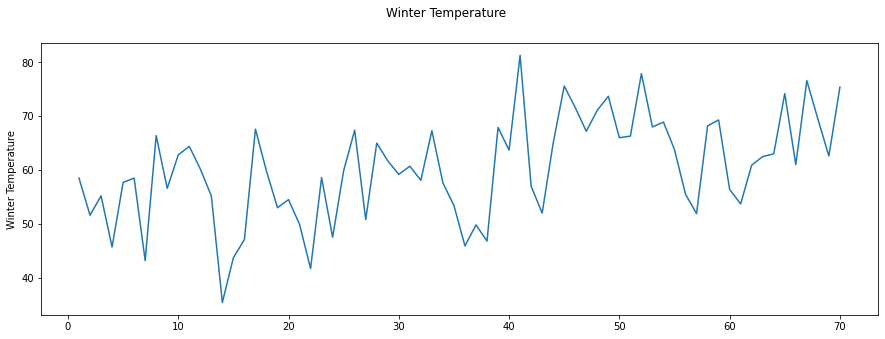

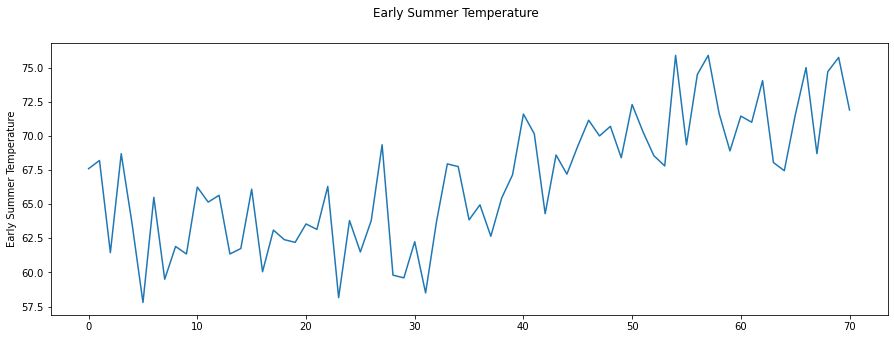

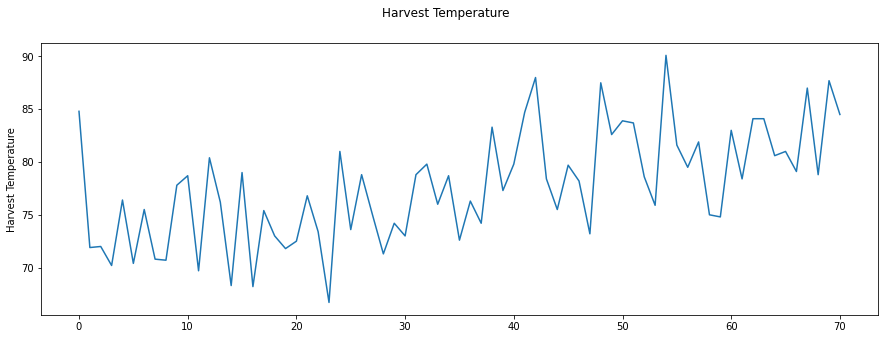

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(x = range(len(X)), y=X['Winter Temperature'])
plt.suptitle('Winter Temperature')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x = range(len(X)), y=X['Early Summer Temperature'])
plt.suptitle('Early Summer Temperature')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x = range(len(X)), y=X['Harvest Temperature'])
plt.suptitle('Harvest Temperature')
plt.show()


## Frost

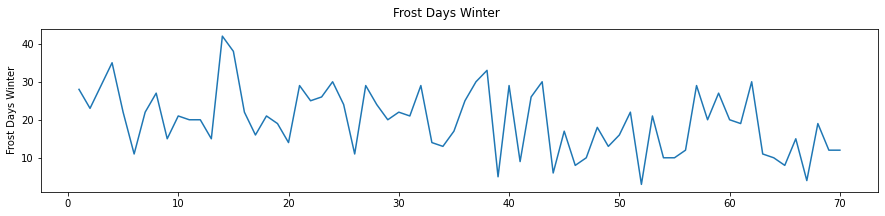

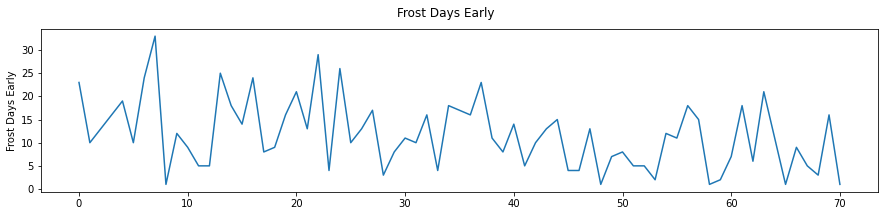

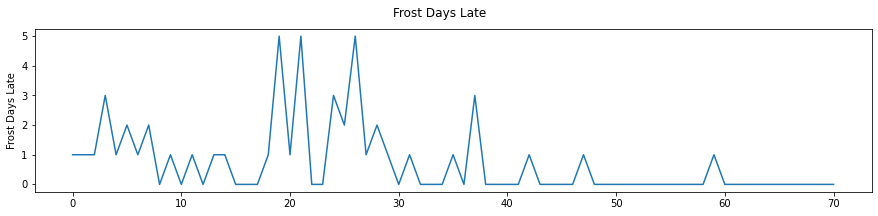

In [29]:
plt.figure(figsize=(15,3))
sns.lineplot(x = range(len(X)), y=X['Frost Days Winter'])
plt.suptitle('Frost Days Winter')
plt.show()

plt.figure(figsize=(15,3))
sns.lineplot(x = range(len(X)), y=X['Frost Days Early'])
plt.suptitle('Frost Days Early')
plt.show()

plt.figure(figsize=(15,3))
sns.lineplot(x = range(len(X)), y=X['Frost Days Late'])
plt.suptitle('Frost Days Late')
plt.show()

## Rain

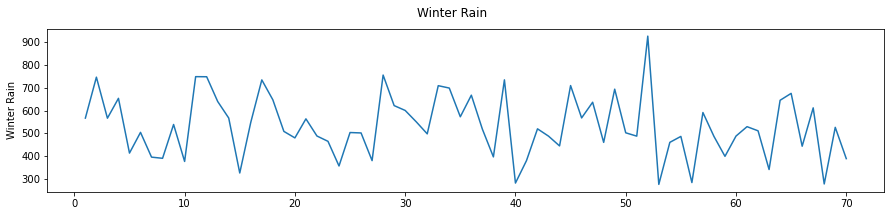

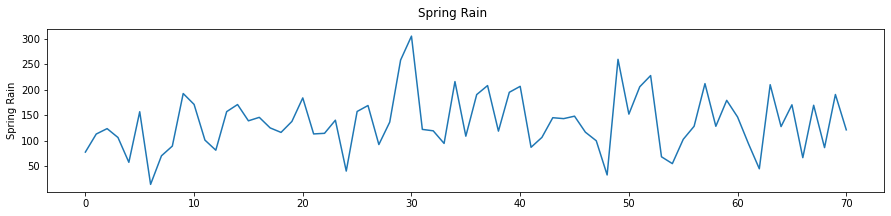

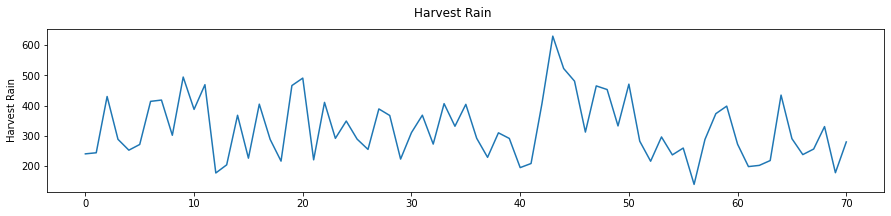

In [28]:
plt.figure(figsize=(15,3))
sns.lineplot(x = range(len(X)), y=X['Winter Rain'])
plt.suptitle('Winter Rain')
plt.show()

plt.figure(figsize=(15,3))
sns.lineplot(x = range(len(X)), y=X['Spring Rain'])
plt.suptitle('Spring Rain')
plt.show()

plt.figure(figsize=(15,3))
sns.lineplot(x = range(len(X)), y=X['Harvest Rain'])
plt.suptitle('Harvest Rain')
plt.show()

## Insulation

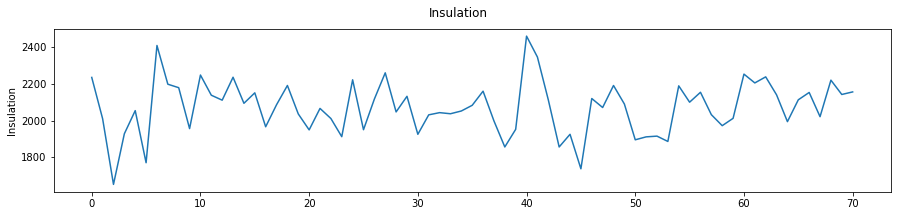

In [33]:
plt.figure(figsize=(15,3))
sns.lineplot(x = range(len(X)), y=X['Insulation'])
plt.suptitle('Insulation')
plt.show()